In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
with open("words.txt") as f:
    words = [line.strip() for line in f.readlines() if len(line.strip()) >= 4]
len(words)

171752

In [3]:
grid = [
    ['c', 'n', 'm', 's'],
    ['u', 'i', 'o', 'm'],
    ['s', 'o', 'i', 'c'],
    ['m', 's', 'a', 'r']
]
grid = np.array(grid)

In [4]:
grid_dict = {(x,y): grid[y, x] for y in range(grid.shape[0]) for x in range(grid.shape[1])}

In [6]:
graph = nx.grid_2d_graph(*grid.shape)
for node in graph.nodes:
    x,y = node
    graph.nodes[node]['letter'] = grid[y, x]

In [7]:
graph.nodes[(0,0)]['letter']

np.str_('c')

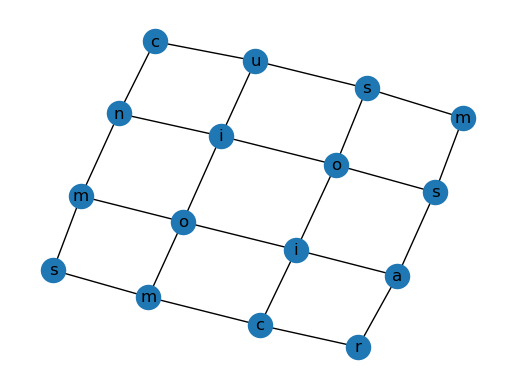

In [8]:
fig, ax = plt.subplots()
nx.draw(graph, labels=grid_dict, ax=ax)

In [ ]:
list(nx.dfs_preorder_nodes(graph, (0,0), depth_limit=3))